# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** Sabrina Putri Difanisa
- **Email:** M283B4KX3995@bangkit.academy
- **ID Dicoding:** [brinaap]

## Menentukan Pertanyaan Bisnis

- Apakah terdapat hubungan antara jam tertentu dengan konsentrasi polutan ('PM10', 'SO2', 'O3') yang lebih tinggi di distrik Wanshouxigong?
- Apakah ada korelasi antara suhu (kolom 'TEMP') di distrik Wanshouxigong dengan tingkat polutannya ('PM10', 'SO2', 'O3')?
- Pada distrik Wanshouxigong bagaimana pola curah hujan setiap bulanya?

## Import Semua Packages/Library yang Digunakan

In [1]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
# Import dataset dan diberi nama air_quality_df
air_quality_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Wanshouxigong_20130301-20170228.csv")
air_quality_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


**Insight:**
- Pengukuran Kualitas Udara:
- Dataset ini mengukur berbagai parameter kualitas udara seperti:
PM2.5: Partikel halus berukuran kurang dari 2,5 mikrometer. Partikel ini sangat berbahaya karena dapat masuk jauh ke dalam paru-paru dan bahkan ke dalam aliran darah.
PM10: Partikel yang lebih besar dari PM2.5, tetapi masih dapat menimbulkan risiko kesehatan.
SO2 (Sulfur Dioksida), NO2 (Nitrogen Dioksida), CO (Karbon Monoksida), dan O3 (Ozon): Ini adalah polutan udara yang mempengaruhi kualitas udara secara keseluruhan dan berdampak pada kesehatan manusia.

- Kondisi Cuaca:
TEMP (Suhu), PRES (Tekanan), DEWP (Dew Point), dan RAIN (Curah Hujan) menunjukkan bahwa kondisi cuaca turut terekam dalam dataset. Parameter cuaca ini bisa berkorelasi dengan tingkat polusi udara.
WSPM (Kecepatan Angin) dan wd (Arah Angin): Arah dan kecepatan angin dapat mempengaruhi penyebaran polutan di udara.

- Variabel Waktu:
year, month, day, hour: Dataset ini mencakup pengukuran berkala dalam satuan jam, sehingga memungkinkan untuk menganalisis pola harian, musiman, atau tahunan terkait kualitas udara.

### Assessing Data

In [3]:
air_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [4]:
# Menampilkan jumlah null values pada tiap variabel lalu mengurutkan dari yang terbesar
null = air_quality_df.isna().sum().sort_values(ascending=False).reset_index()
# Mengganti nama kolom menjadi 'null_count'
null = null.rename(columns={0:'null_count'})
# Membuat kolom baru berupa percentages yang menampilkan persentase null value pada masing-masing variabel terhadap jumlah record keseluruhan
null['percentages'] = (null['null_count']/35064)*100
# Memfilter variabel yang terdapat null values
null = null[null['null_count'] > 0]
null

,index,null_count,percentages
0,CO,1297,3.698950
1,O3,1078,3.074378
2,NO2,754,2.150354
3,PM2.5,696,1.984942
4,SO2,669,1.907940
5,PM10,484,1.380333
6,wd,79,0.225302
7,PRES,19,0.054187
8,RAIN,19,0.054187
9,DEWP,19,0.054187


In [5]:
# Mengecek missing value
air_quality_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,696
PM10,484
SO2,669
NO2,754
CO,1297


In [6]:
# Mengecek duplikat data
air_quality_df.duplicated().sum()

0

In [7]:
air_quality_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34368.000000,34580.000000,34395.000000,34310.00000,33767.000000,33986.000000,35045.000000,35045.000000,35045.000000,35045.000000,35051.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,85.024136,112.223459,17.148603,55.52956,1370.395031,56.229904,13.784477,1011.511804,2.707442,0.064320,1.745314
std,10122.249256,1.177213,3.448752,8.800218,6.922285,85.975981,97.593210,23.940834,35.80805,1223.139114,57.082710,11.385156,10.570928,13.704139,0.796981,1.206355
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.00000,100.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,28.00000,600.000000,8.000000,3.400000,1002.800000,-8.500000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,91.000000,8.000000,49.00000,1000.000000,42.000000,14.800000,1011.000000,3.300000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,154.000000,21.000000,77.00000,1700.000000,82.000000,23.500000,1020.000000,15.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,961.000000,411.000000,251.00000,9800.000000,358.000000,40.600000,1042.000000,28.500000,46.400000,13.200000


**Insight:**
- Dataset ini memiliki 35,064 entri.
- Dataset ini tidak memiliki nilai duplikat
- Terdapat beberapa kolom dengan nilai yang hilang (missing values):

 - PM2.5: 696 nilai hilang ;
 - PM10: 484 nilai hilang.
 - SO2: 669 nilai hilang.
 - NO2: 754 nilai hilang.
 - CO: 1,297 nilai hilang.
 - O3: 1,078 nilai hilang.
 - TEMP, PRES, DEWP, RAIN: 19 nilai hilang masing-masing.
 - wd: 79 nilai hilang.
 - WSPM: 13 nilai hilang

### Cleaning Data

In [8]:
# Membersihkan Missing Value dengan metode interpolasi
air_quality_df = air_quality_df.interpolate(method='linear')

# Mengecek missing value
air_quality_df.isna().sum()

<ipython-input-8-aef580ffc359>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  air_quality_df = air_quality_df.interpolate(method='linear')


,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [9]:
# Mengisi missing values pada kolom wd dengan modus
air_quality_df['wd'].fillna(air_quality_df['wd'].mode()[0], inplace=True)

# Mengecek missing value
air_quality_df.isna().sum()

<ipython-input-9-3d96bd1c94ba>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  air_quality_df['wd'].fillna(air_quality_df['wd'].mode()[0], inplace=True)


,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


**Insight:**
- Karena dataset ini termasuk time series sehingga mengisi missing value dengan metode interpolasi
- Pada kolom 'wd' masih tersisa missing value sebesar 79 data , maka digantilah nilai yang hilang dengan menggunakan modus

## Exploratory Data Analysis (EDA)

### Explore ...

In [10]:
# Menghitung rata-rata polutan berdasarkan jam
average_pollutants_by_hour = air_quality_df.groupby('hour')[[ 'PM10', 'SO2', 'O3'	]].mean().reset_index()
average_pollutants_by_hour


,hour,PM10,SO2,O3
0,0,123.751470,16.753150,38.151391
1,1,121.092094,17.030218,34.833439
2,2,118.210096,16.248127,32.215527
3,3,111.453971,15.599155,30.245830
4,4,105.307383,15.087616,28.148555
5,5,100.638603,14.727219,26.159897
6,6,99.598879,14.465270,25.033215
7,7,100.709805,14.875103,24.303317
8,8,105.736885,16.731204,26.587731
9,9,106.504502,19.136639,34.015042


In [11]:
temp_corr = air_quality_df[['TEMP','PM10', 'SO2', 'O3']].corr()
temp_corr

,TEMP,PM10,SO2,O3
TEMP,1.000000,-0.146343,-0.355623,0.618409
PM10,-0.146343,1.000000,0.504534,-0.146845
SO2,-0.355623,0.504534,1.000000,-0.190224
O3,0.618409,-0.146845,-0.190224,1.000000


In [12]:
rain_stats = air_quality_df['RAIN'].describe()
print(rain_stats)

count    35064.000000
mean         0.064285
std          0.796766
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         46.400000
Name: RAIN, dtype: float64


**Insight:**
- Pertanyaan 1 :
 - Mengahasilkan rata-rata setiap polutan per jam nya
- Pertanyaan 2 :
 - Memaparkan nilai korelasi tiap tiap polutan dengan temperatur
- Pertanyaan 3 :
 - Memaparkan statistik deskriptif hujan untuk mengetahui trend hujan setiap bulannya

## Visualization & Explanatory Analysis

### Pertanyaan 1:

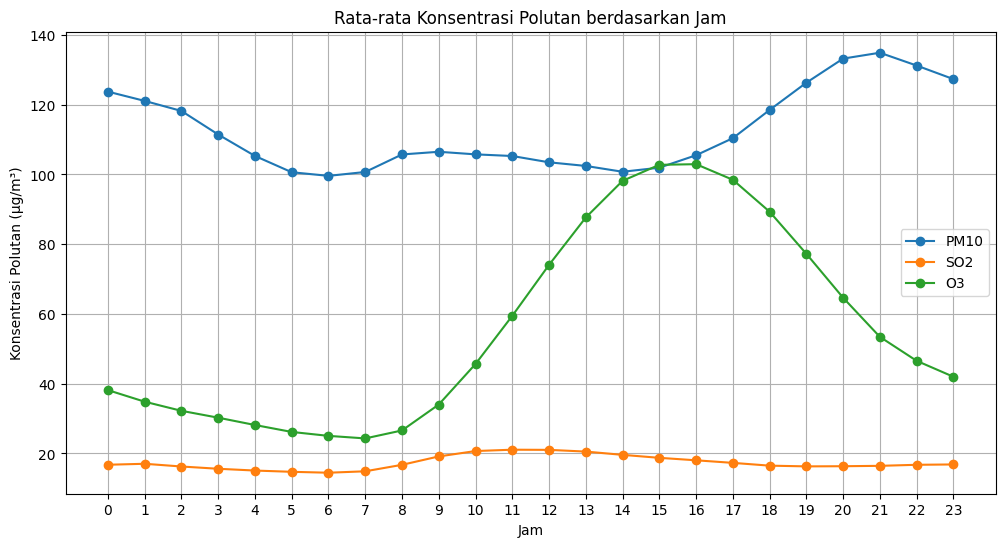

In [13]:
# Visualisasi
plt.figure(figsize=(12, 6))
plt.plot(average_pollutants_by_hour['hour'], average_pollutants_by_hour['PM10'], label='PM10', marker='o')
plt.plot(average_pollutants_by_hour['hour'], average_pollutants_by_hour['SO2'], label='SO2', marker='o')
plt.plot(average_pollutants_by_hour['hour'], average_pollutants_by_hour['O3'], label='O3', marker='o')
plt.title('Rata-rata Konsentrasi Polutan berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Konsentrasi Polutan (µg/m³)')
plt.xticks(average_pollutants_by_hour['hour'])
plt.legend()
plt.grid()
plt.show()

Grafik diatas menunjukkan rata-rata konsentrasi polutan berdasarkan jam
- PM10 (Garis Biru):
Konsentrasi PM10 relatif tinggi sepanjang hari, dengan fluktuasi ringan antara 100-130 µg/m³.
Konsentrasi PM10 cenderung menurun antara jam 1 hingga 7 pagi, tetapi kemudian naik lagi mulai dari jam 8 hingga mencapai puncaknya sekitar jam 23.
Ini menunjukkan bahwa konsentrasi partikel PM10 lebih tinggi pada malam hari.

- O3 (Garis Hijau):Konsentrasi O3 mulai rendah di awal hari (sekitar 30 µg/m³), tetapi mulai naik drastis sekitar jam 10 dan mencapai puncaknya pada jam 13-14 (lebih dari 100 µg/m³), setelah itu menurun secara bertahap hingga malam hari.Konsentrasi O3 mencapai puncaknya di siang hari ketika sinar matahari paling kuat, yang merupakan fenomena umum karena O3 terbentuk melalui reaksi fotokimia dengan sinar ultraviolet.

- SO2 (Garis Oranye): Konsentrasi SO2 adalah yang paling stabil dan rendah di antara ketiga polutan, berkisar di bawah 25 µg/m³ sepanjang hari, dengan sedikit fluktuasi.
Polutan ini tidak mengalami perubahan signifikan seperti PM10 atau O3, menunjukkan bahwa sumber polutan ini mungkin lebih konsisten dan tidak terpengaruh oleh kondisi lingkungan seperti cuaca atau aktivitas harian.

### Pertanyaan 2:

<function matplotlib.pyplot.show(close=None, block=None)>

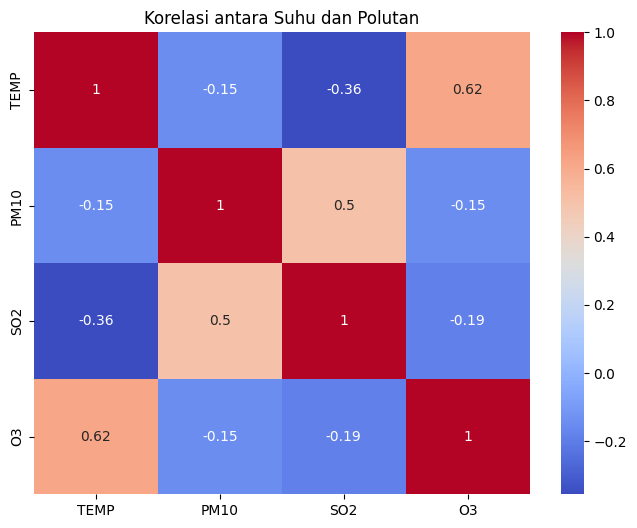

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(temp_corr, annot=True, cmap='coolwarm')
plt.title('Korelasi antara Suhu dan Polutan')
plt.show

Korelasi antara Suhu (TEMP) dan Polutan:

- O3 memiliki korelasi positif yang cukup kuat dengan suhu (0.62).
- PM10 dan SO2 memiliki korelasi negatif dengan suhu (-0.15 dan -0.36).

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

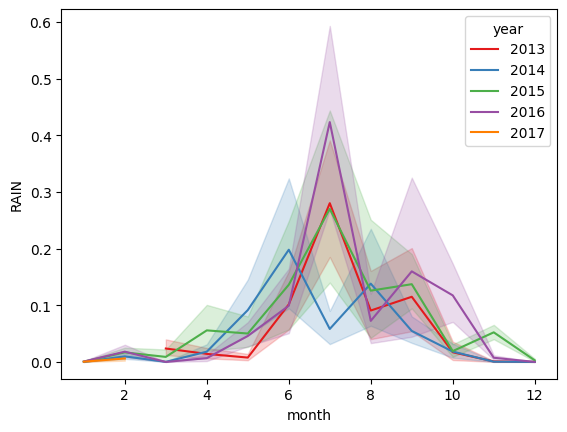

In [15]:
sns.lineplot(x=air_quality_df['month'], y=air_quality_df['RAIN'], hue=air_quality_df['year'], palette='Set1')
plt.show()

**Insight:**
- Berdasarkan grafik pertama yaitu grafik garis menunjukkan
Konsentrasi PM10 lebih tinggi di malam hari
Konsentrasi O3 mencapai puncak di siang hari, dan Konsentrasi SO2 tetap stabil dan rendah
- Berdasarkan grafik kedua yaitu HeatMap : O3 memiliki korelasi positif yang cukup kuat dengan suhu (0.62). Ini menunjukkan bahwa ketika suhu meningkat, konsentrasi O3 juga cenderung meningkat. PM10 dan SO2 memiliki korelasi negatif dengan suhu (-0.15 dan -0.36). Ini menunjukkan bahwa ketika suhu meningkat, konsentrasi PM10 dan SO2 cenderung menurun
- Berdasarkan grafik ketika yaitu grafik garis dapat disimpulkan bahwa di Distrik Wanshouxigong, curah hujan menunjukkan kecenderungan yang tinggi dari bulan keenam (Juni) hingga bulan kesembilan (September).

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
 - Konsentrasi PM10 lebih tinggi di malam hari di Distrik Wanshouxigong, kemungkinan disebabkan oleh aktivitas lalu lintas dan industri yang berlanjut hingga malam.
 - Konsentrasi O3 mencapai puncak di siang hari di Distrik Wanshouxigong, kemungkinan besar karena aktivitas fotokimia yang dipicu oleh sinar matahari.
 - Konsentrasi SO2 tetap stabil dan rendah di Distrik Wanshouxigong, menunjukkan bahwa sumber polutan ini mungkin berasal dari pembakaran bahan bakar atau aktivitas industri yang stabil sepanjang hari.

- Conclution pertanyaan 2
 - Suhu memiliki dampak yang cukup besar terhadap O3 di Distrik Wanshouxigong, di mana peningkatan suhu mendorong peningkatan konsentrasi O3.
 - Korelasi antara suhu dan PM10 serta SO2 bersifat negatif, meskipun tidak terlalu kuat, yang berarti suhu yang lebih tinggi mungkin membantu mengurangi konsentrasi polutan tersebut pada Distrik Wanshouxigong.

- Conclution pertanyaan 3
  - Pada Distrik Wanshouxigong, curah hujan menunjukkan kecenderungan yang tinggi dari bulan keenam (Juni) hingga bulan kesembilan (September).